Arjun Joshi. Brainstation Capstone <br>
December, 2024<br>
Diploma Program: Data Science

<html>
<style>
sup {
    vertical-align: super;
    font-size: smaller;
}
</style>
<p>
<sub><h3><center>Capstone. Case Study: Application of Anthropogenic WSM </center></h3></sub>
<sup></sup><h1> <center>DATA CLEANING, EDA & PRE-PROCESSING</sup>
<sup><h3> .ANTHROPOGENIC PRESSURES. </h3></sup><center></center></h1>
</html>


##### Run intro scripts

In [494]:
# Set working directory to notebook dir
import os
from statsmodels.tsa.stattools import adfuller
from dbfread import DBF
os.chdir('J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks\\scripts')

In [495]:
pwd

'J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks\\scripts'

In [496]:
os.chdir('J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks\\scripts')

In [497]:
# Load libraries
%run imports.py
%run DataDictionary.py
%run stored_functions.py

In [498]:
check_stationarity

<function __main__.check_stationarity(timeseries)>

### **Introduction : Context and Notebook Overview**

As stated in the ReadMe, 3 supplementary notebooks cover cleaning, EDA, requisite baseline modelling for each individual environment/ecosystem/overarching framework - which are ultimately used to measure the performance of the Anthropogenic Pressure Index (API)

Figure 1 below shows the geography, scale and basic information about the Tampa Region. The marked area in white in the top left image shows the town where the marine construction in this case study has been proposed.

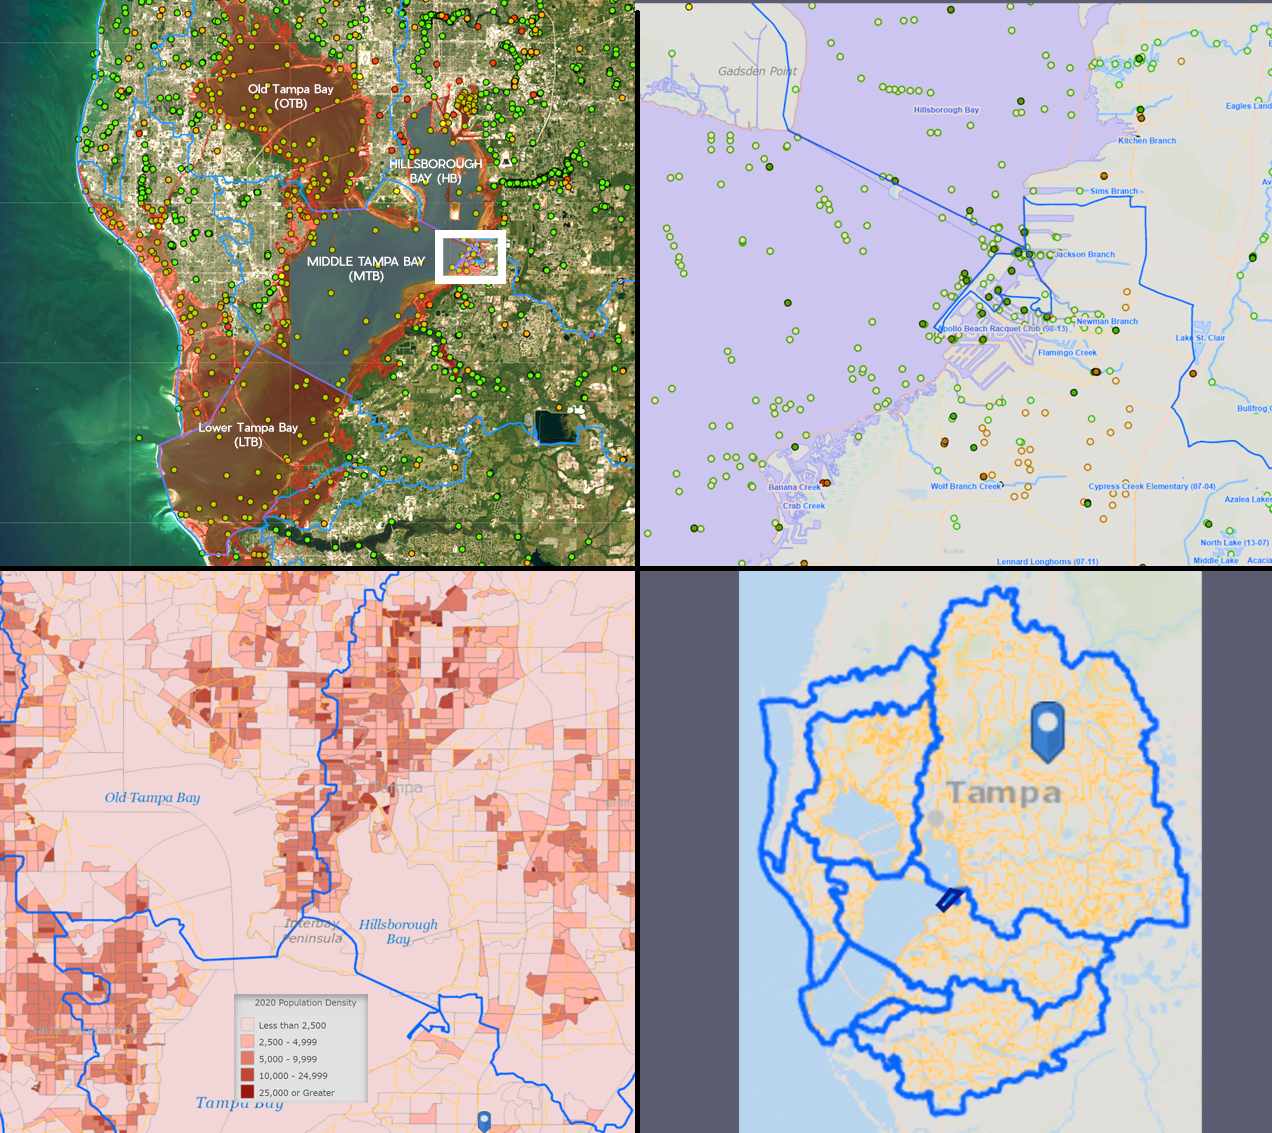

<sup>Figure1.<br>
> (A) Top L. marked sections of Tampa Bay <br>
> (B) Top R. Sampling Sites Near Proposed Construction site. prominent filled circles are active, all others are not inactive <br>
> (C) Bottom L. 2020 Population Density of Tampa Bay Region <br>
> (D) Bottom R. The massive scale of the watershed, the marked area is the HB watershed and the one directly underneath is MTB. <br>Marking in the >     center of the the image is the proposed study site </sup>


>>> Regional Watershed Area Descriptions.<br>
>>> **HB Watershed**: Area (Sq Miles) : 1,281.83 <br>
>>> **MTB watershed**: Area (Sq Miles) : 410.31 <br>

When considering the nutrient loading, nitrogen in particular, it's important to understand the scale of the watershed - all of which flows into the bay. The H.C. is massive, covering nearly 1300 sq miles. That area includes large amounts of agricultral land, new residential and commercial construction.

Notebook Context: This notebook processes what is considered to be data describing Anthropogenic Pressures on the coastal ecosystem.
Notebook Purpose: Clean, Pre-process Anth.Gen. data, including EDA and baseline modelling, in order to establish crucial relationships between features.<br> This notebook requires an understanding of Nitrogen compounds in the ecosystem, if they're organic or not and their patterns over time. Unlike the biology specific data, Anth. Gen. data obtained has a sampling structure and consistency to attempt a Time-Series Analysis.
<br>
<br>
*I encourage anyone reviewing the code to utilize the Table of Contents for easy navigation.*<br>
Each subcategory has it's own section for cleaning, EDA, processing and baselines modelling (if applicable)
There are 3 major areas of focus covered, the notebook is also organized accordingly:<BR>
1. Section: Nitrate Concentrations, Water Quality (ADF, TSA)
2. Section: Property Development Metrics
3. Section: Population Growth Metrics (Linear Regression)


##### Post-Intro Note : 2 Features Omitted

*Two additional possible sources of anth. pressures were in the original design of the study: marine recreational traffic and geospatial analysis. These were omitted because it was not feasible to get records of marine traffic without paying a respectable amount for GIS-hosted GPS data for vessels. Data obtained did not include GPS during a trip, only start, end and if any stops were made or ports called upon. Geospatial data had to be omitted due to loss of data due to hardware issues. This will be pursued in subsequent expansion on this study.*

*Please refer to the ReadMe for a more detailed look into the complexities and impacts of Anth. Gen. on coastal marine ecosystems.*

#### Fx, Definitions, Read Data

#### Functions (if applicable)

In [499]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
  """
  Performs an Augmented Dickey-Fuller test to check stationarity of a time series.
  """
  result = adfuller(timeseries)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Example usage:
# Assuming your time series data is in a pandas Series called 'data'
check_stationarity(data)

ValueError: x is required to have ndim 1 but has ndim 2

#### Read CSV into Pandas DF

##### Nutrient Loading Data

In [ ]:
os.chdir('J:/Brainstation/BS Git/data/human Imact')

In [ ]:
# There are 4 sections of Tampa Bay.
# This study covers 2 but can expanded to all. Refer to map in introduction section

# Import Middle Tampa Bay (MTB) Water Quality (WQ) data. 1990-2024
mtbwq=pd.read_csv('MTB_WQ.csv',low_memory=False)

# Import Hillsborough Bay (HB) W.Q. data. 1990-2024
hbwq=pd.read_csv('HB_WTQ.csv',low_memory=False)

##### Property Development

In [ ]:
# New data directory
os.chdir('J:/Brainstation/BS Git/Property Records')

In [ ]:
proprx=pd.read_csv('PRIMARY_PROPRX.csv',low_memory='False')

##### Population Growth

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\data\\human Imact\\MarineTraffic')

In [ ]:
dfpop_staged=pd.read_csv('StagedPopulations.csv')

## Feature Space 1: Nitrate Loading; Water Quality Index

Tables loaded in at start of notebook.<br>Tables:<BR>
> _(hbwq)_   Hillsborough Bay (HB)<br>
> _(mtbwq)_ Middle Tampa Bay (MTB)<br>
These 2 data sets are closest in proximmity to the study site, the focus of the study. <br>
This dataset can always be expanded at a later date.

Objective: <BR>Establish clear pattern between 3 forms of Nitrogen compounds in the bay:<br>
Nitrates and Nitrates (NO3,NO2-).   Ammonia/Ammonium (NH3).       Organic Nitrogen.

Key Info:<BR>
Nitrates/Nitrites (NO3, No2-), and ammonia(NH3/NH4+) are inorganic forms of nitrogen and either represent the slow breakdown of organic material or input from external sources. Part 1 must demonstrate that NH3 and N03 compound(s) vary, with significance, from behaviors and patterns observed in Organic Nitrogen.
mtbwq.head(5)

In [ ]:
# Df read-in check
hbwq.head(5)

In [ ]:
# Df read-in check
mtbwq.head(5)

In [ ]:
#null check
print(mtbwq.isna().sum())
hbwq.isna().sum()

In [ ]:
# Checking column names
mtbwq.Actual_Latitude
mtbwq.columns[[6,7]]

In [ ]:
# Standardizing some columns between these 2 datasets

In [ ]:
hbwq.rename(columns={'Latitude_DD':'Latitude','Longitude_DD':'Longitude'},inplace=True)
hbwq.head(5)

In [ ]:
# Standardizing some columns between these 2 datasets

In [ ]:
mtbwq.rename(columns={'Actual_Latitude':'Latitude','Actual_Longitude':'Longitude'},inplace=True)
mtbwq.head(5)

In [ ]:
hbwq.Characteristic.value_counts()

** This study uses Organic and Inorganic forms of nitrogen and phosphorous as a proxy for anthropogenic introduction of harmful chemicals into the bay. This study examines these 2 features in 2 main ways:<br>
- As an aggregate statistic that describes the functioning of the bay at large
- The  ratio of organic to inorganic  compounds that describe that extent of anthropogenic and ultimately harmful versions of these compounds introduced.

In [ ]:
# looking specifically for the forms of Nitrogen.
# Nitrogen comes in Nitrogen Organic, Nitrogen, Nitrates, Nitrites, Ammonia, Ammonium

# HBWQ - Hillsborough Bay Water Quality
# MTBWQ - Middle Tampa Bay Water Quality

index_1=hbwq.Characteristic.str.contains('Nit,nit').index==True

In [ ]:
len(index_1)

In [ ]:
# Isolate Nit. in HB
Nit=hbwq.Characteristic.str.contains('Nitrogen')

In [ ]:
Nit.head()

In [ ]:
# Phosphate isolation. Omitted.
# Remnant from initial EDA 
pho_hb=hbwq.Characteristic.str.contains('Phosph')

### Data Wrangling, EDA / Pre-Processing

#### WQI Sample Frequency, Consistency Check

In [ ]:
# Begin EDA, aggregations for patterns
hbwq.SampleDate.str.slice(-4).value_counts().reset_index().sort_values(by='SampleDate')

In [ ]:
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

In [ ]:
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)

In [ ]:
# Sanity Check
hbwq.head(3)

In [ ]:
mtbwq.head(3)

In [ ]:
print(hbwq[hbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))

In [ ]:
# Checking for distribution of sample counts by month
print(mtbwq[mtbwq.SampleDate.dt.year==1990].SampleDate.dt.month.value_counts().reset_index().sort_values(by='SampleDate'))

#### _Preliminary EDA and processing of subset, 1990, used in initial EDA and construction of baseline models. CODE OUTDATED_

In [ ]:
# MTB. HB. Isolate for 1990
mtbwq1990=mtbwq[mtbwq.SampleDate.dt.year==1990]
hbwq1990=hbwq[hbwq.SampleDate.dt.year==1990]

In [ ]:
# Exploring at data for 1 month
mtbwq1990[mtbwq1990.SampleDate.dt.month==1].sort_values(by='SampleDate')

In [ ]:
# Format dt values
mtbwq.SampleDate=pd.to_datetime(mtbwq.SampleDate)
hbwq.SampleDate=pd.to_datetime(hbwq.SampleDate)

In [ ]:
# Looking for missing weekly samples
import matplotlib.dates as mdates

plt.figure(figsize=(10,4),facecolor='slategray')
sns.histplot()
ax = sns.histplot(x=hbwq1990_samplefreq.SampleDate,bins=52)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.grid(True)
plt.xticks(rotation=45)
plt.title('Sampling Distribution (all compounds) in HB, 1990')
#plt.xticks(range('1990-01-01','1990-12-31', 365))
plt.show()

In [ ]:
#sanity
hbwq1990.head(2)

In [ ]:
# Isolate Nitrates, complete examination of subset of data
nitrogen_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Nitr','nitr')==True]
nitrogen_1990.head(5)

##### EDA: Isolation of Nitrogen Compounds, 1990 subset

The dataset has multiple entries for each sample event. The same sample is analyzed and described in multiple ways. Consequently, data needs to be isolated to get a consistent single data set.

In [ ]:
# Create Phosphate df
phosphate_hb=hbwq[hbwq.Characteristic.str.contains('Phos','phos')==True]
phosphate_hb.SampleDate=pd.to_datetime(phosphate_hb.SampleDate)
phosphate_hb.head(2)

In [ ]:
#Isolate Phosphate
phosphate_1990=hbwq1990[hbwq1990.Characteristic.str.contains('Phos','phos')==True]
phosphate_1990.head(5)

In [ ]:
# Checking Units
pd.concat([nitrogen_1990.Characteristic.value_counts(),nitrogen_1990.ResultUnit.value_counts()],axis=1)

In [ ]:
# Isolate Nit
nitrate1990=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('Nitrogen, Nitrite')]
print(nitrate1990.shape)
nitrate1990.reset_index(drop=True,inplace=True)
nitrate1990.head(3)

In [ ]:
# Test nitrate isolation
nitrate1990[nitrate1990.ResultUnit.isna()]
nitrate1990.ResultUnit.fillna('ug/l',inplace=True)
nitrate1990[nitrate1990.ResultUnit.isna()]

In [ ]:
# Standardize units
for i in nitrate1990.index:
    if nitrate1990.loc[i,'ResultUnit']=='ug/l':
        nitrate1990.loc[i,'ResultValue']=nitrate1990.loc[i,'ResultValue']/1000
        nitrate1990.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [ ]:
# Create subset with features of interest
nitrate_subset=nitrate1990[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude']]

In [ ]:
# date format
nitrate_subset['month']=nitrate_subset.SampleDate.dt.month
nitrate_subset

In [ ]:
# look at nitrate patterns over 1 year period
nitrate_subset_plot=nitrate_subset.groupby('month').ResultValue.agg(['mean','std','min','max'])
nitrate_subset_plot.head(12)

In [ ]:
# Isolate ammmonia
ammonia1990=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('ammon')].sort_values(by='SampleDate').reset_index(drop=True)
print(ammonia1990.shape)
ammonia1990.head()

In [ ]:
# Check for units for standardization
ammonia1990.ResultUnit.value_counts()

In [ ]:
# Will need to standardize units
ammonia1990[ammonia1990.ResultUnit=='ug/l'].ResultValue

In [ ]:
# Std. ammonia units
for i in ammonia1990.index:
    if ammonia1990.loc[i,'ResultUnit']=='ug/l':
        ammonia1990.loc[i,'ResultValue']=ammonia1990.loc[i,'ResultValue']/1000
        ammonia1990.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [ ]:
ammonia1990.ResultUnit.value_counts()

In [ ]:
ammonia_subset=ammonia1990[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude']]

In [ ]:
#Drop amm. dupes
print(ammonia_subset.duplicated().value_counts())
ammonia_subset=ammonia_subset.drop_duplicates()
print(ammonia_subset.duplicated().value_counts())
ammonia_subset.head(5)

In [ ]:
# any null values would be in ug/l format
ammonia_subset.ResultUnit.fillna('ug/l',inplace=True)

In [ ]:
# Standardize 
for i in ammonia_subset.index:
    if ammonia_subset.loc[i,'ResultUnit']=='ug/l':
        ammonia_subset.loc[i,'ResultValue']=ammonia1990.loc[i,'ResultValue']/1000
        ammonia_subset.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [ ]:
# date format
ammonia_subset['month']=ammonia_subset.SampleDate.dt.month

In [ ]:
# aggregate amm. to monthly for 1 year, look at patterns
ammonia_subset_plot=ammonia_subset.groupby('month').ResultValue.agg(['mean','std','min','max'])
ammonia_subset_plot.head(12)

In [ ]:
pwd

In [ ]:
hbconcat=hbwq[['DataSourceName','StationID','Latitude','Longitude','SampleDate','SampleTime','Characteristic','ResultUnit','ResultValue','WaterbodyName']]
hbconcat.head(3)

In [ ]:
# Daily sample times are not relevant. setting to constant to avoid bad aggregations
mtbwq['SampleTime']='0:00:00'

In [ ]:
mtbwq.head(1)

In [ ]:
# isolate features
mtbconcat=mtbwq[['DataSource','StationID','Latitude','Longitude','SampleDate','SampleTime','Characteristic','Result_Unit','Result_Value','WaterBodyName']]
mtbconcat.head(3)

In [ ]:
# null check
mtbconcat.DataSource.isna().value_counts()

In [ ]:
# rename units to match HB
mtbconcat.rename(columns={'WaterBodyName':'WaterbodyName','DataSource':'DataSourceName','Result_Unit':'ResultUnit','Result_Value':'ResultValue'},inplace=True)
mtbconcat.head(1)

In [ ]:
# Union HB and MTB into 1 df
combwq=pd.concat([hbconcat,mtbconcat])
combwq.head(5)

In [ ]:
# check nitrogen compounds isolated
combwq[combwq.Characteristic.str.contains('Nit')==True].Characteristic.value_counts()

In [ ]:
combwq.shape

In [ ]:
### There was one sampling station / service that was producing highly irregular nitrate values
### I suspect that they were correct - but there were so few measurements that, as significant outliers, it was better
### to remove them from the dataset. They were orders higher.

### Samples for this station from all datasets needs to be removed
combwq.drop(combwq[combwq.StationID=='560'].index,inplace=True)

In [ ]:
#Checking to ensure iso of nitrates
combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True]

In [ ]:
combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True].shape

In [ ]:
# Export data for processing outside of notebook
combwq.to_csv('NIT_FINAL.csv')

Note: Kjeldahl units are a measurement of nitrogen that typically represents concentrations of organic Nitrogen. It is an engineered measurement, where a water sample is treated with a catalytic agent to convert nitrogen into ammonia, similar to the decomposition process.

In [ ]:
# Isolation kjedahl measurements
kjedahl=nitrogen_1990[nitrogen_1990.Characteristic.str.contains('Kjeld')]
print(kjedahl.shape)
kjedahl.head(5)

In [ ]:
print(kjedahl.ResultUnit.isna().value_counts())
kjedahl.ResultUnit.value_counts()

In [ ]:
# Look at units
kjedahl[kjedahl.ResultUnit=='ug/l'].head()

In [ ]:
# std. kjel units
for i in kjedahl.index:
    if kjedahl.loc[i,'ResultUnit']=='ug/l':
        kjedahl.loc[i,'ResultValue']=kjedahl.loc[i,'ResultValue']/1000
        kjedahl.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [ ]:
kjedahl.reset_index(drop=True,inplace=True)
kjedahl.sort_values(by='SampleDate').reset_index(drop=True,inplace=True)

In [ ]:
#date format
kjedahl['month']=kjedahl.SampleDate.dt.month

In [ ]:
# isolate kjel features of interest
kjedahl_subset=kjedahl[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]

In [ ]:
# sanity check
kjedahl_subset.head(5)

In [ ]:
# search for inconsistent values, outlier values
kjedahl_subset[kjedahl_subset.ResultValue>2]

In [ ]:
# Kjeldahl measurements are typically higher than that of NO3 or NH4 - mg/l were initially chosen here.
# NO3 and NH4 were later standardized to mg/l when processing the full dataset
# std. units to mg/l
for i in kjedahl.index:
    if kjedahl_subset.loc[i,'ResultValue']>2:
            kjedahl_subset.loc[i,'ResultValue']=kjedahl_subset.loc[i,'ResultValue']/1000
            kjedahl_subset.loc[i,'ResultUnit']='mg/l'
        #ammonia1990.ResultValue=ammonia1990.ResultValue/1000

In [ ]:
# monthly aggregations to look at subset annual pattern
kjedahl_subset_plot=kjedahl_subset.groupby('month').ResultValue.agg(['mean','std','max','min'])
kjedahl_subset_plot.head(12)

In [ ]:
# Patterns
fig,ax=plt.subplots(figsize=(6,6),facecolor='slategray')
sns.lineplot(x='month',y='mean',data=kjedahl_subset_plot,errorbar=('ci',.95),color='green',ax=ax)
ax=plt.gca()
ax.set_facecolor('lightgray')
ax1=ax.twinx()
sns.lineplot(x='month',y='mean',data=ammonia_subset_plot,errorbar=('ci',.95),color='red',ax=ax1)
sns.lineplot(x='month',y='mean',data=nitrate_subset_plot,errorbar=('ci',.95),color='blue',ax=ax1)
plt.title('Mean Concentration of Nitrogen Compounds in HB/MTB, 1990')
plt.grid(True)
plt.show()

#### Processing Full Nitrate Dataset

In [ ]:
# Isolate each compound of interest
nitrates=combwq[combwq.Characteristic.str.lower().str.contains('nitra','nitri')==True]
kjeldahl=combwq[combwq.Characteristic.str.lower().str.contains('kjel')==True]
ammonia=combwq[combwq.Characteristic.str.lower().str.contains('ammo')==True]

In [ ]:
print(nitrates.shape)
print(kjeldahl.shape)
print(ammonia.shape)

In [ ]:
# Select only mg/l units
nitrates_mg=nitrates[nitrates.ResultUnit=='mg/l']
kjeldahl_mg=kjeldahl[kjeldahl.ResultUnit=='mg/l']
ammonia_mg=ammonia[ammonia.ResultUnit=='mg/l']

In [ ]:
# sample size reduced. Many rows were duplicates using the other measurement unit.
print(nitrates_mg.shape)
print(kjeldahl_mg.shape)
print(ammonia_mg.shape)

In [ ]:
# drop null values. Not imputing anything yet
nitrates_mg.dropna(inplace=True)
kjeldahl_mg.dropna(inplace=True)
ammonia_mg.dropna(inplace=True)
print(nitrates_mg.shape)
print(kjeldahl_mg.shape)
print(ammonia_mg.shape)

In [ ]:
nitrates_mg.ResultValue.isna().value_counts()

In [ ]:
ammonia_mg.ResultValue.isna().value_counts()

In [ ]:
kjeldahl_mg.ResultValue.isna().value_counts()

In [ ]:
# distribution checks. log scale
plt.hist(nitrates_mg.ResultValue)
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:nitrates mg df histogram')
plt.grid(True)
plt.show()

In [ ]:
# distribution checks. log scale

plt.hist(ammonia_mg.ResultValue)
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:ammonia mg df histogram')
plt.grid(True)
plt.show()

In [ ]:
# distribution checks. log scale

plt.hist(kjeldahl_mg.ResultValue,bins=50)
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.yscale('log')
plt.ylabel('sample count')
plt.xlabel('Concentration Value')
plt.title('outlier check:kjeldahl mg df histogram')
plt.grid(True)
plt.show()

In [ ]:
## This value will get removed when the dataset time period is reduced
kjeldahl_mg[kjeldahl_mg.ResultValue>10]

In [ ]:
nitrates_mg_temp=nitrates_mg.reset_index()
#nitrates_mg[nitrates_mg.ResultValue>3].reset_index()
nit_iloc=nitrates_mg_temp[nitrates_mg_temp.ResultValue>2.5].index
for i in nit_iloc:
    nitrates_mg.iloc[i,-2]=nitrates_mg.iloc[i,-2]/1000

In [ ]:
# standardize units
kjeldahl_mg['month']=kjeldahl_mg.SampleDate.dt.month
ammonia_mg['month']=ammonia_mg.SampleDate.dt.month
nitrates_mg['month']=nitrates_mg.SampleDate.dt.month

In [ ]:
# Isolate features of interest
kjeldahlsub=kjeldahl_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]
ammoniasub=ammonia_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]
nitratesub=nitrates_mg[['DataSourceName','StationID','SampleDate','SampleTime','ResultValue','ResultUnit','Latitude','Longitude','month']]

In [ ]:
# Checking for outliers
ammoniasub[ammoniasub.ResultValue>2]

In [ ]:
# Using a temp table to work around coding errors
# Looking at outlier data. Assess whether unit conv was issue
index_amm_temp=ammoniasub[ammoniasub.ResultValue>3].index
ammoniasub.loc[index_amm_temp].ResultValue=ammoniasub.loc[index_amm_temp].ResultValue/1000

In [ ]:
# station suspected culprit for outlier values
kjeldahl_mg[kjeldahl_mg.StationID=='560']

In [ ]:
# create year col
kjeldahlsub['year']=kjeldahlsub.SampleDate.dt.year
ammoniasub['year']=ammoniasub.SampleDate.dt.year
nitratesub['year']=nitratesub.SampleDate.dt.year

In [ ]:
# creating a col that sets all months to a starting day of 1
kjeldahlsub['day']=1
ammoniasub['day']=1
nitratesub['day']=1

In [ ]:
# format dt
kjeldahlsub['DateMonth']=pd.to_datetime(kjeldahlsub.astype(str).month+'-'+kjeldahlsub.astype(str).day+'-'+kjeldahlsub.astype(str).year)
ammoniasub['DateMonth']=pd.to_datetime(ammoniasub.astype(str).month+'-'+ammoniasub.astype(str).day+'-'+ammoniasub.astype(str).year)
nitratesub['DateMonth']=pd.to_datetime(nitratesub.astype(str).month+'-'+nitratesub.astype(str).day+'-'+nitratesub.astype(str).year)

In [ ]:
# isolate dataset to years of interest in the study
kjeldahlsub=kjeldahlsub[kjeldahlsub.year>1989]
nitratesub=nitratesub[nitratesub.year>1989]
ammoniasub=ammoniasub[ammoniasub.year>1989]

In [ ]:
# create better date column
nitratesub.SampleDate=pd.to_datetime(nitratesub.SampleDate.astype(str).str.slice(0,10))
kjeldahlsub.SampleDate=pd.to_datetime(kjeldahlsub.SampleDate.astype(str).str.slice(0,10))
ammoniasub.SampleDate=pd.to_datetime(ammoniasub.SampleDate.astype(str).str.slice(0,10))

In [ ]:
#outlier check
kjeldahlsub[kjeldahlsub.ResultValue>4]

**Only Kjeldahl in the filtered dataset follow a normal distribution, whereas Nitrates and Ammonia are heavily right-skew**
<br>

In [ ]:
### Only Kjeldahl has a normal distribution

plt.hist(kjeldahlsub.ResultValue,bins=50)
ax=plt.gca()
ax.set_facecolor('lightgray')

#"plt.yscale('log')
plt.title('distribution of kjeldahl values at log scale')
plt.text(1.5, 100, f'Num of kjel val above 2mg/L= {kjeldahlsub[kjeldahlsub.ResultValue>4].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

In [ ]:
plt.hist(nitratesub.ResultValue,bins=50)
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.yscale('log')
plt.title('distribution of nitrate values at log scale')
plt.text(1.5, 100, f'Num of NO3 val above 2mg/L= {nitratesub[nitratesub.ResultValue>2].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

In [ ]:
plt.hist(ammoniasub.ResultValue,bins=50)
ax=plt.gca()
ax.set_facecolor('lightgray')
plt.yscale('log')
plt.title('distribution of ammonia values at log scale')
plt.text(1.5, 100, f'Num of NH3 val above 2mg/L= {ammoniasub[ammoniasub.ResultValue>2].ResultValue.count()}', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

In [ ]:
# Setting checkpoint
ksub=kjeldahlsub.copy()
asub=ammoniasub.copy()
nsub=nitratesub.copy()

In [ ]:
# Adding some columns to standardize dates and make next steps easier

ksub['week']=ksub.SampleDate.dt.isocalendar().week
asub['week']=asub.SampleDate.dt.isocalendar().week
nsub['week']=nsub.SampleDate.dt.isocalendar().week
ksub['adj_date']=pd.to_datetime(ksub['year'].astype(str) + '-W' + ksub['week'].astype(str) + '-1', format='%Y-W%W-%w')
asub['adj_date']=pd.to_datetime(asub['year'].astype(str) + '-W' + asub['week'].astype(str) + '-1', format='%Y-W%W-%w')
nsub['adj_date']=pd.to_datetime(nsub['year'].astype(str) + '-W' + nsub['week'].astype(str) + '-1', format='%Y-W%W-%w')
ksub.drop(columns='DateMonth',inplace=True)
asub.drop(columns='DateMonth',inplace=True)
nsub.drop(columns='DateMonth',inplace=True)
ksub.sort_values(by='SampleDate',inplace=True)
asub.sort_values(by='SampleDate',inplace=True)
nsub.sort_values(by='SampleDate',inplace=True)

In [ ]:
# There are missing weeks that need to be imputed. This should be weekly data from 1990-2024
# Creating a df with all weeks, including missing values. Will outer join all nitrate groups, remove duplicates, impute or interpolate missing values
data = []
for year in range(1990, 2025):  # 24 years from 1990 to 2024
    for week in range(1, 53):  # Weeks 1 to 52
        data.append([year, week])
weekly=pd.DataFrame(data=data,columns=['year','week'])
weekly['adj_date']=pd.to_datetime(weekly['year'].astype(str) + '-W' + weekly['week'].astype(str) + '-1', format='%Y-W%W-%w')
print(len(data))
print(len(weekly))
print(weekly.min())
weekly.max()

In [ ]:
# Make sure the datasets are as clean as possible (missing values dealt with later)
ksub.drop_duplicates(inplace=True)
asub.drop_duplicates(inplace=True)
nsub.drop_duplicates(inplace=True)

print(ksub.shape)
print(asub.shape)
print(nsub.shape)

In [ ]:
# outer join kjeldahl df, no loss of data
test=weekly.merge(ksub,left_on=weekly.adj_date,right_on=ksub.adj_date,how='outer',suffixes=('_dt','_K'))

In [ ]:
# adj_date_dt remains complete, dropping key_0
test.info()
test.drop(columns='key_0',inplace=True)
test.head(2)

In [ ]:
# outer join ammonia results, no loss of data
# all units are standardized to mg/l
# need to keep key_0 as it's the only complete date column.
test2=test.merge(asub['ResultValue'],left_on=[test.adj_date_dt,test.DataSourceName,test.StationID],right_on=[asub.adj_date,asub.DataSourceName,asub.StationID],how='outer',suffixes=('_dt','_A')).drop_duplicates()
test2.rename(columns={'key_0':'adj_date'},inplace=True)
test2.drop(columns=['key_1','key_2'],inplace=True)

In [ ]:
# outer join nitrate results, no loss of data
# all units are standardized to mg/l
# last merge

test3=test2.merge(nsub['ResultValue'],left_on=[test2.adj_date,test2.DataSourceName,test2.StationID],right_on=[nsub.adj_date,nsub.DataSourceName,nsub.StationID],how='outer',suffixes=('_dt','_N')).drop_duplicates()

In [ ]:
test3.info()

In [ ]:
# Isolate columns of interest
nmerge_stage=test3[test3.columns[[0,7,13,14,11,20,21]]]

In [ ]:
nmerge_stage.head(1)

In [ ]:
# Rename columns

nmerge_stage.columns=['date_adj','DataSourcveName','Lat','Long','ResultValue_K','ResultValue_A','ResultValue_N']
print(nmerge_stage.shape)
nmerge_stage.head(2)

In [ ]:
# Establish independent copy of merged base table
nmerge_base=nmerge_stage.copy()

In [ ]:
nmerge_base[nmerge_base.ResultValue_N>2]

In [ ]:
# Aggregate at weekly date intervals
nmerge_stage2=nmerge_stage.groupby('date_adj').agg({
    'ResultValue_K':'mean',
    'ResultValue_A':'mean',
    'ResultValue_N':'mean'
})

In [ ]:
# Extra weeks beyond the end of the dataset (8/26/24)
# Cut out extra weeks
# Check for nulls
nmerge_stage3=nmerge_stage2.iloc[:-17,:]
nmerge_stage3.isna().sum()

There are fewer missing values than expected! That's good, interpolation shouldn't be a problem. <br>
Seasonality shouldn't be expected for periods less than a month. <br>
Interpolation with 2 period in both directions should give best approximation of values.<br>

In [ ]:
nmerge=nmerge_stage3.interpolate(method='linear', limit_direction='both', limit=2)

In [ ]:
print(f'{nmerge.info()}\n\n\nSHAPE:\n{nmerge.shape}\n\n\n\nDESCRIBE:\n{nmerge.describe()}')
nmerge.head(2)

In [ ]:
print(f'nmerge shape:\n {nmerge.shape}\n')
print(f'######\n\nMerge1 duplicates: \n{nmerge.duplicated().value_counts}\n\n######\nResultAction:')
if nmerge.duplicated().any():
    print('True.Duplicates, drop\n')
    nmerge.drop_duplicates(inplace=True)
else:
    print('False. No Duplicates, no drop\n')
print(f'######\n\nNulls:\n{nmerge.isna().sum()}\n')
print(f'######\nnew shape:{nmerge.shape}')
if nmerge.columns[0]=='key_0':
    print('Newly created key columns not dropped\nColumns now dropped')
    nmerge.drop(columns=nmerge.columns[[0,1,2]],inplace=True)
else:
    print('Columns not dropped')
nmerge.head(3)


In [ ]:
# change directory for exporting of df
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\Nutrient_loading')

In [ ]:
ksub.to_csv('kjeldahl.csv')
nsub.to_csv('nitrate.csv')
asub.to_csv('ammonia.csv')
nmerge.to_csv('nit_merged_mean.csv')

### Modelling

#### Augmented Dickey-Fuller Test for Univariate Stationarity

_**Aug. Dickey-Fuller Test:**_
>Hypothesis-<br>
>**H<sub>0</sub>**: Individual nitrogen-compound features do not exhibit statistically significant stationarity <br>
>**H<sub>1</sub>**: Individual nitrogen-compound features do exhibit stationarity over time

In [ ]:
nmerge['K_moving_average'] = nmerge.ResultValue_K.rolling(window=36).mean()
nmerge['A_moving_average'] = nmerge.ResultValue_A.rolling(window=36).mean()
nmerge['N_moving_average'] = nmerge.ResultValue_N.rolling(window=36).mean()

In [ ]:
# Separate df into raw values and moving avg
VAR_data=nmerge.iloc[:,0:3]
rolling_avg_data=nmerge.iloc[:,-3:]

In [ ]:
rolling_avg_data=nmerge.iloc[:,:-3]

In [ ]:
nmerge

In [ ]:
# Splits scaled data
train_data, test_data = train_test_split(VAR_data, test_size=0.3, shuffle=False)

# Scale data
scaler=MinMaxScaler()
scaler_VAR=MinMaxScaler()
scaler.fit(train_data)
scaler_VAR.fit(VAR_data)
train_data_scaled = pd.DataFrame(scaler.transform(train_data), columns=train_data.columns, index=train_data.index)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index) 

In [ ]:
# Running ADF test
for i in train_data.columns:
    print(f'Unscaled Data:{i}\n{check_stationarity(VAR_data[i])}\n')
    print(f'TRAIN Feature:{i}\n{check_stationarity(train_data_scaled[i])}\n')
    print(f'TEST Feature:{i}\n{check_stationarity(test_data_scaled[i])}\n\n###############')

When run with the original, full unscaled dataset, null hypothesis is rejected
- Scaled Train data demonstrates stationarity for all features.
- Test data instructs to reject the null hypothesis for Ammonia, both a high p-value and small ADF relative to critical values.<br>
ADF statistic < Critical Values(1%)<br><br>

Running VAR next.

In [ ]:
# Splits scaled data
train_data, test_data = train_test_split(VAR_data, test_size=0.3, shuffle=False)

# Scale data
scaler=MinMaxScaler()
scaler2=MinMaxScaler()
scaler.fit(train_data)
train_data_scaled = pd.DataFrame(scaler.transform(train_data), columns=train_data.columns, index=train_data.index)
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index) 

In [ ]:
VAR_scaled=scaler2.fit_transform(VAR_data)

In [ ]:
# VAR Model
model = VAR(train_data_scaled)
model2 = VAR(VAR_scaled)
# Fit Scaled VAR Lasso
#results = model.fit(method='ols', alpha=0.1, L1_wt=1, lags=12) 
#results = model.fit(maxlags=12, ic='aic', trend='ct', seas=52)  

In [ ]:
results=np.array([])
results

In [ ]:
results4=model.fit(maxlags=4,ic='aic')
results8=model.fit(maxlags=8,ic='aic')
results12=model.fit(maxlags=12,ic='aic')
results16=model.fit(maxlags=16,ic='aic')
results26=model.fit(maxlags=26,ic='aic')
results_whole4=model2.fit(maxlags=4,ic='aic')
results_whole12=model2.fit(maxlags=12,ic='aic')
results_whole26=model2.fit(maxlags=26,ic='aic')

In [ ]:
results=[results4,results8,results12,results16,results26]
results_unscale=[results_whole4,results_whole12,results_whole26]

In [ ]:
#loop through stored result objects
#Print
for i in results:
    print(i.summary())
for i in results_scale:
    print(i.summary())

In [ ]:
results4.plot()
plt.grid(True)
plt.show()

In [ ]:
lags = 12  
last_observations = train_data_scaled.values[-lags:]  
forecast = results12.forecast(y=last_observations, steps=len(test_data))

In [ ]:
# Create a DataFrame with actual and forecasted values
forecast_df = pd.DataFrame({
    'Actual_K': test_data['ResultValue_K'],
    'Forecast_K': forecast[:, 0],  # Assuming Kjeldahl is the first variable
    'Actual_A': test_data['ResultValue_A'],
    'Forecast_A': forecast[:, 1],  # Assuming ammonia is the second variable
    'Actual_N': test_data['ResultValue_N'],
    'Forecast_N': forecast[:, 2]   # Assuming nitrates is the third variable
}, index=test_data.index)

# Calculate error metrics (example with MAE)
mae_k = mean_absolute_error(forecast_df['Actual_N'], forecast_df['Forecast_N'])

In [ ]:
forecast_df

In [ ]:
### Results of the model without forecasting

In [ ]:
# Plot the actual vs. forecasted values for Kjeldahl
# The model shows barely any sign of seasonality in the first few forecasted periods before reaching a plateau, where it remains for the rest of the time series.

plt.figure(figsize=(12, 6),facecolor='slategray')
plt.plot(forecast_df['Actual_K'], label='Actual')
plt.plot(forecast_df['Forecast_K'], label='Forecast')
plt.title('Kjeldahl Nitrogen - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
ax.set_facecolor('lightgray')

plt.show()

# Repeat the plotting for ammonia and nitrates
plt.figure(figsize=(12, 6),facecolor='slategray')
plt.plot(forecast_df['Actual_A'], label='Actual')
plt.plot(forecast_df['Forecast_A'], label='Forecast')
plt.title('Ammonia - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
ax.set_facecolor('lightgray')

plt.legend()
plt.show()

plt.figure(figsize=(12, 6),facecolor='slategray')
plt.plot(forecast_df['Actual_N'], label='Actual')
plt.plot(forecast_df['Forecast_N'], label='Forecast')
plt.title('Nitrates - Actual vs. Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
ax.set_facecolor('slategray')

plt.legend()
plt.show()

In [ ]:
rolling_avg_data

In [ ]:
fig,ax=plt.subplots(figsize=(9,9),facecolor='slategray')
sns.lineplot(x=nmerge.index,y=VAR_data.ResultValue_K,label='Raw Kjel',color='teal')
sns.lineplot(x=nmerge.index,y=rolling_avg_data.K_moving_average,label='Mov. Avg. Kjel',color='red')
ax1=ax.twinx()
sns.lineplot(x=nmerge.index,y=VAR_data.ResultValue_K,label='Raw Kjel',color='teal',ax=ax1)
sns.lineplot(x=nmerge.index,y=rolling_avg_data.K_moving_average,label='Mov. Avg. Kjel',color='red',ax=ax1)
ax1.set_yscale('log')
plt.grid(True)
ax.set_facecolor('lightgray')
plt.title('Kjeldahl 1990-2024, Raw and Moving Average')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8),facecolor='slategray')
#sns.lineplot(x=nmerge.index,y=nmerge.ResultValue_A,label='Raw Ammonia',color='black',lw=1,ax=ax-)
ax1=ax.twinx()
#sns.lineplot(x=nmerge.index,y=nmerge.ResultValue_N,label='Raw Nitrates',color='orange',lw=1,ax=ax1)
sns.lineplot(x=nmerge.index,y=rolling_avg_data.K_moving_average,label='Mov. Avg. Kjel',color='teal',ax=ax)
sns.lineplot(x=nmerge.index,y=rolling_avg_data.A_moving_average,label='Mov. Avg. Ammonia',color='red',lw=4,ax=ax1)
sns.lineplot(x=nmerge.index,y=rolling_avg_data.N_moving_average,label='Mov. Avg. Nitrates',color='orange',lw=4,ax=ax1)
plt.grid(True)
ax.set_facecolor('lightgray')
plt.legend()

plt.title('Nitrates/Ammonia 1990-2024, Raw and Moving Average')
plt.show()

__** VAR lacks predictive power but was good at explaining the data present. More below. Exported CSVs were imported in the NEKTON notebook for further processing **__

### Nitrogen Loading Conclusions

Due to issues with formatting the datetime index, I haven't been able to get the frequency to set properly and, consequently, forecasting likely will be unhelpful. Results and conclusions drawn from the model should be understood with this in mind as it's difficult to assess the accuracy and performance of the model, particularly as a forecasting model. There are inferences that can be drawn about the relationships captured by the model between the 3 features.

The model had the most difficulty handling Nitrate values. P-values were less than 0.05 only in 4 lag iterations of the model - spiking beyond 0.45 in the next tier of 8 lags. The results do show, however, in the 4 and subsequent 8 lag iterations, nitrates has strong autocorrelation at the 4 week intervals (L1,L4,L8) which may provide insight into its sources. The 4 week lag period could be related to the transport time of nitrates through the watershed, which begins far inland before draining into the river systems and ultimately the bay. Monthly cyclicality of anthrogenic comunity services - such as agricultral practices, sewage treatment, would correlate  

There is some noted influence of ammonia on Kjeldahl values at lag 1 and lag 4, which could be explained by the conversion of organic nitrates into ammonia in the mineralisation process. The Kjelahl method also is measured as ammonia measured while processing water samples with a catalyst agent. Indirect influences of biological processes and existing levels of ammonia could explain this relationship; however, this is only one observation and not the primary driver of Kjeldahl concentrations or vice-versa.

Kjeldahl is more complex with of autocorrelation at lag 1,2,8,9, influences on ammonia at lag 1,2,4 and nitrogen  while also impacting ammonia at week 1,2,4, and nitro at possible 1 and 2; however, this does lend confidence to its use as a proxy as the organic form of nitrogen in the ecosystem. Decay and decomposition would impact ammonia and nitrate concentrations.

Low values of AIC and BIC are encouraging that the model performed reasonably well in explaining the existing data; however, no conclusions can be made about the model's predictive power without being rerun with corrected datasets and evaluation of its performance through error metrics.

I am confident though in proceeding with the base assumptions necessary to proceed its application in the development of the API (index).

In [ ]:
plt.figure(facecolor='slategray',figsize=(5,5))
ax=plt.gca()
ax.set_facecolor('lightgrey')
nmerge.A_moving_average.plot(color='y',lw=4)
nmerge.N_moving_average.plot(color='r',lw=4)
plt.grid(True)
plt.yscale('log')
plt.title('Log Scale Moving Average of Ammonia and \nNitrate Nitrogen-compounds in Tampa Bay, 1990-2024',color='BLACK')
plt.show()

Measurements of Nitrogen in Kjeldahl can be understood as measuerments of organic nitrogen found water systems.
Measurements of Ammonia (NH3/NH4+) can be understood as anthropogenic sources of nitrogen
Measurements of Nitrates/Nitrites are anthropogenic sources of nitrogen.

In order to use Ammonia and Nitrates as factors for the API while using Kjeldahl measurements as a feature of the marine ecosystem, it has to be shown that there's correlation between NH3,NO3 ~ Kjel.<br>

This study uses vector autoregression (VAR) to look at these relationships in a time series.

Sampling frequency, measurements have been standardized for frequency and units.<br>
Missing values have been interpolated. 

## Development 99.206KM COASTLINE NOT INCLUDING WATERWAYS

Here is the introduction of construction, real estate and development influences on the bay.
It is difficult to retrieve consisten data for land usage, development and coastal construction, due to privacy rights, hidden data and more.

Possible methods:
- Aggregation of construction data through issued permits and property records
- Land use categories
- Construction. Looking at permits, construction dates and even sales can inform development rates.

Initially, this study proposed looking at waterfront properties; the full property record dataset was used for 2 reasons. 1- Quantity of Data. Annual figures for construction would have been too low. More importantly, because of the size of the watershed (extending beyond county lines),  fertilizers, sewage treatment and other anth.gen. substances can be traced far inland. These compounds have been shown to be the most damaging to the Tampa Bay ecosystem. Input from increased activity, development and subsequent contamination of the water that feeds the bay should be evaluated by development at greater resolution. These have an equal weighted influence on anthropogenic pressures on the local marine ecosystem.

Data:
A CSV has consolidated all of the property records. These include construction dates, which are used as proxies for development rates.
The primary features of interest are
- Property Acreage
- Year Built
- Number of structures built
- Land type
- Total square footage of structure

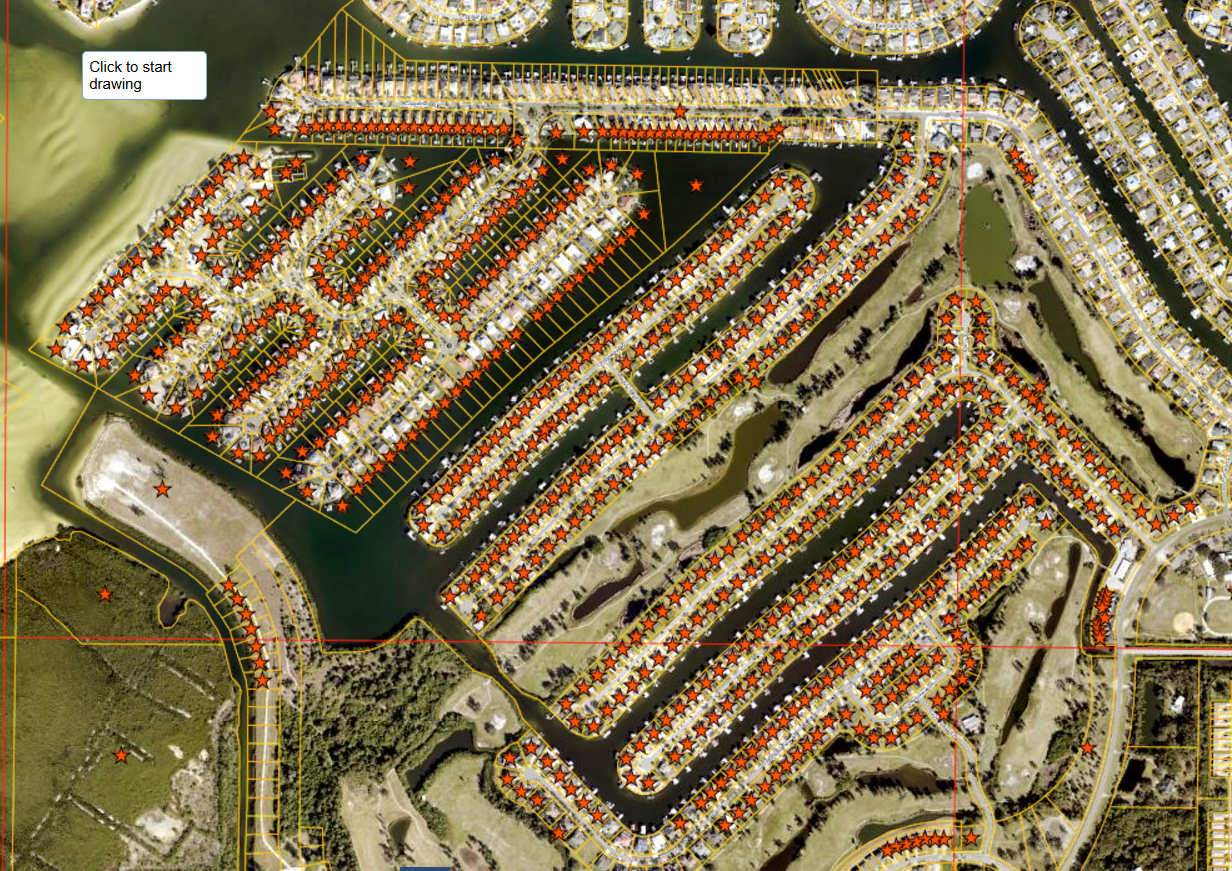

In [ ]:
proprx

#### Processing df from initial dev of models (CODE OUTDATED)

In [ ]:
AB_2.info()

In [ ]:
dflist=[
AB_1,
AB_2,
AB_3,
AB_4,
AB_5,
AB_6,
AB_7,
GIB_8,
RIV_1]

In [ ]:
dfprop=pd.DataFrame(data=AB_2)

In [ ]:
# Combine all sections of property data
# dfprop = 'Dataframe: Property'
for x in dflist:
    print(x.shape)
    dfprop=pd.concat([dfprop,x],axis=0)

In [ ]:
dfprop1=dfprop.copy()

In [ ]:
dfprop.head(5)

In [ ]:
dfprop.shape

In [ ]:
AB_1.head(1)

In [ ]:
AB_2.head(1)

In [ ]:
AB_3.head(3)

In [ ]:
dfprop.info()

In [ ]:
"""
Columns for Selection Pressure analysis

3,
8,
14,
15,
25,
26,
30,
36,
40,
42

"""

In [ ]:
#Selecting columns of interest
dfprop.drop_duplicates(inplace=True)

In [ ]:
dfprop=dfprop[dfprop.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [ ]:
RIV_1=RIV_1[RIV_1.columns[[0,3,13,14,15,25,27,30,36,40,42]]]

In [ ]:
RIV_1.shape

In [ ]:
dfprop.shape

In [ ]:
dfprop1

In [ ]:
# Join remaining df csv for a consolidated table
dfprop=pd.concat([dfprop,RIV_1])

In [ ]:
#null check
dfprop.isna().sum()

In [ ]:
# To be consildated into higher aggregate categories: Residential, Commercial, Industrial, Other
dfprop.PropertyType.value_counts()

In [ ]:
# Slight cleaning of the data
# Some of the grids overlapped so these rows must be accounted for
dfprop.duplicated().value_counts()

In [ ]:
dfprop.info()

In [ ]:
dfprop.isna().sum()

In [ ]:
dfprop.Acreage

In [ ]:
dfprop.PropertyType.value_counts()

#### Data Cleaning

In [ ]:
dfprop.PropertyType.isna().sum()

In [ ]:
dfprop.PropertyType.fillna('undefined',inplace=True)

In [ ]:
dfprop.duplicated().sum()

In [ ]:
# Get rid of redundant data rows|
dfprop.drop_duplicates(inplace=True)

In [ ]:
dfprop.isna().sum()

In [ ]:
dfprop.duplicated().value_counts()

In [ ]:
dfprop[dfprop.SiteCity.isna()==True]

In [ ]:
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0]

In [ ]:
# not all columns are relevant and their NaN, null or 0 status is not important
dfprop.isna().sum()

In [ ]:
# Improved plots that have been misclassified
dfprop[dfprop.VacantImproved.isna() & dfprop.YearBuilt>0].VacantImproved.fillna('Improved',inplace=True)

In [ ]:
# Looking for common traits - perhaps it speaks to why these properties were misclassified and and relevance
dfprop[dfprop.YearBuilt==0].PropertyType.unique()

In [ ]:
dfprop

In [ ]:
dfprop.sort_values(by='YearBuilt').YearBuilt.value_counts().sort_index()

#### Full Property Dataset
Data Description file also found in repo

In [ ]:
# df check
proprx.head(2)

In [ ]:
#col check
# ACT ='Actual Year Built'
proprx.info()

In [ ]:
# No properties missing built date
proprx.isna().sum()

In [ ]:
#lookat act values
#there are 0 values
proprx.ACT.head(20)

In [ ]:
print(proprx.ACT.value_counts())
print('\nSHAPE: ',proprx.ACT.shape)
proprx[proprx.ACT==0].shape

About 10% loss of records, which is acceptable given the number of records.

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\Property Records\\GIS\\Zips')

In [ ]:
proprx

In [ ]:
proprx.info()

In [ ]:
#isolate features
proprx2=proprx.groupby(['SITE_CITY','ACT','tUNITS','tBLDGS','HEAT_AR'])['ACREAGE'].agg({'mean','min','max'}).reset_index()

In [ ]:
proprx2

In [ ]:
# Agg House construction by year
# Year is the most granular offered by dataset
annbuilt=proprx2.groupby('ACT').ACT.sum()
annbuilt=annbuilt.to_frame().reset_index(names=['yrbuilt'])

In [ ]:
# isolate to 2024
annbuilt=annbuilt[annbuilt.yrbuilt.between(1989,2024)]

In [ ]:
annbuilt.head(2)

Primary features of interest for simple model are Year Built, Acreage, totalGrossAreaSqft.

Understanding the relationship between development per property and population density and growth will be a calculated feature used in the construction of the HII-aquatic index.

In [ ]:
annbuilt=annbuilt.groupby('yrbuilt').ACT.agg({'sum','mean','min','max'})

In [ ]:
annbuilt.reset_index(inplace=True)

In [ ]:
annbuilt.head(2)

In [ ]:
annbuilt=annbuilt[['yrbuilt','sum']]
annbuilt.head(2)

In [ ]:
# Look at construction over time for all of HC
plt.figure(figsize=(6,6))
annbuilt.plot('yrbuilt','sum')
plt.yscale('log')
plt.title('construction over time for all of HC')
plt.show()

Construction Data needs to be scaled so that it can be used in the index

In [ ]:
annbuilt.index=annbuilt.yrbuilt

In [ ]:
annbuilt.drop(columns='yrbuilt',inplace=True)

In [ ]:
# Creating values scaled to a range of 0-1
scaler = MinMaxScaler()
#fit,transform
houses_built_scaled = scaler.fit_transform(annbuilt.values.reshape(-1, 1))

In [ ]:
# New standardized df
houses_built_scaled

In [ ]:
construction_scale=pd.DataFrame(houses_built_scaled)

In [ ]:
construction_scale['year']=annbuilt.index

In [ ]:
construction_scale.rename(columns={0:'scaled'},inplace=True)

In [ ]:
annbuilt

In [ ]:
plt.figure(facecolor='slategray')
sns.lineplot(x='year',y='scaled',data=construction_scale)
plt.title('Relative Total Annual Construction, Tampa Bay 1990-2024')
ax=plt.gca()
plt.grid(True)
plt.yscale('log')

The impact of coastal development extends beyond the shoreline. In an estuarine environment, the watersheds that feed into the estuary (or in the case the bay) are equally important. Using a highway as a physical boundary overlapped with a map of the various watersheds, a representative set of properties, the type, their acreage and the year that they were built will be used as an estimate and proxy for coastline development.  Based on research literature, concentration of non-organic nitrates and phosphates will serve as a proxy for the introduction of artificial damaging compounds - however, in the construction of more complex models, more granular data can be used.

Population Rate of Change

In [ ]:
## New Construction estimates by year

In [ ]:
# Get annual change of homes built on hillsborough bay coast from 1990-present
perchange=[]
year=1989
year1=[]
x_base=[]
x1=[]
for x in range(1989,1990+len(annbuilt)):
    if x==0:
        continue
    elif x==1988+len(annbuilt):
        break
    else:
        perchange.append(round((annbuilt[x+1]/annbuilt[x])*100,3))
        x_base.append(annbuilt[x])
        x1.append(annbuilt[x+1])
    year+=1
    year1.append(year)

In [ ]:
perchange[0:5]

In [ ]:
dfperchange=pd.DataFrame()
dfperchange['percentchange']=perchange

In [ ]:
dfperchange['x']=x_base
dfperchange['x+1']=x1
dfperchange['year']=year1

In [ ]:
dfperchange.head(5)

In [ ]:
dfprop[dfprop.YearBuilt>1989].groupby(['YearBuilt']).TotalNumBuildings.agg(['min', 'max', 'std', 'sum'])w

In [ ]:
dfacreage

In [ ]:
# Describes number of houses built in subset data, total number of units per built structure
# Multi-unit buildings have an increased environmental impact per individual parcel
dfperchange_unit

### Population

In [ ]:
### Looking into population statistics now

In [ ]:
dfpop=pd.DataFrame()
dfpop['year']=0
dfpop['sumpop']=0

In [ ]:
dfpop_staged.iloc[:,1]

In [ ]:
dfpop_staged
## This file was originally a geodatabase file that has been read in as a CSV to access the non-geospatial data.

In [ ]:
dfpop_staged

In [ ]:
dfpop_staged.info()

In [ ]:
est_pop=dfpop_staged.iloc[0:,21:29]

In [ ]:
#area=sum(dfpop_staged.iloc[1:,10])

In [ ]:
# Set up series for 5 year intervals
f=pd.Series()
counter=1990
for x in est_pop.columns:
    f[counter]=sum(est_pop[x])
    counter+=5

In [ ]:
f=f.to_frame().reset_index()

In [ ]:
f

In [ ]:
#calculate population density
popden=f[0]/area

In [ ]:
year=[1990,1995,2000,2005,2010,2015,2020,2025]

In [ ]:
model=LinearRegression()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(popden.year,popden.density, test_size=0.3, shuffle=False)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test) 

In [ ]:
den.to_csv('population_density.csv')

In [ ]:
#Validate large data set patterns by testing population data sourced separately

In [ ]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\Population Data')

In [ ]:
pop_metro=pd.read_csv('tampa_metro_population.csv',header=0)

In [ ]:
pop_metro.info()

In [493]:
plt.figure(figsixe=(7,7),facecolor=gray)
sns.lineplot(x='Year',y='Population',data=pop_metro)
plt.xlabel='year'
plt.ylabel='Population'
sns.lineplot(x='Year',y='Population',data=pop_metro)
plt.xlabel='year'
plt.grid(True)

NameError: name 'gray' is not defined

In [500]:
sns.lineplot(x='Year',y='Population',data=pop_metrWWo)
plt.xlabel='year'
plt.ylabel='Population'

NameError: name 'pop_metrWWo' is not defined